# Medical Appointment No-Show Prediction

This notebook covers the journey from raw data cleaning to machine learning model evaluation for no-show prediction in healthcare.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [4]:
df.shape

(110527, 14)

## Data Cleaning and Feature Engineering

We handle missing values, correct date/time inconsistencies, and explore basic statistics and feature distributions.


In [5]:
df.drop(['PatientId', 'AppointmentID'] , axis=1 , inplace=True)
df['No-show']=df['No-show'].map({"Yes":1 , "No":0})

In [6]:
df['No-show'].value_counts()

No-show
0    88208
1    22319
Name: count, dtype: int64

In [7]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])



In [8]:
df['Scheduled_Date']=df['ScheduledDay'].dt.date
df['Appointment_Date']=df['AppointmentDay'].dt.date


In [9]:
df['Scheduled_Time']=df['ScheduledDay'].dt.time
df['Appointment_Time']=df['AppointmentDay'].dt.time


In [10]:
df['Scheduled_Date']

0         2016-04-29
1         2016-04-29
2         2016-04-29
3         2016-04-29
4         2016-04-29
             ...    
110522    2016-05-03
110523    2016-05-03
110524    2016-04-27
110525    2016-04-27
110526    2016-04-27
Name: Scheduled_Date, Length: 110527, dtype: object

In [11]:
df['days_difference'] = (df['AppointmentDay'].dt.date - df['ScheduledDay'].dt.date).apply(lambda x: x.days)


In [12]:
df[['AppointmentDay','ScheduledDay','Scheduled_Date','Scheduled_Time','Appointment_Date','Appointment_Time','days_difference']].head(10)

,AppointmentDay,ScheduledDay,Scheduled_Date,Scheduled_Time,Appointment_Date,Appointment_Time,days_difference
0,2016-04-29 00:00:00+00:00,2016-04-29 18:38:08+00:00,2016-04-29,18:38:08,2016-04-29,00:00:00,0
1,2016-04-29 00:00:00+00:00,2016-04-29 16:08:27+00:00,2016-04-29,16:08:27,2016-04-29,00:00:00,0
2,2016-04-29 00:00:00+00:00,2016-04-29 16:19:04+00:00,2016-04-29,16:19:04,2016-04-29,00:00:00,0
3,2016-04-29 00:00:00+00:00,2016-04-29 17:29:31+00:00,2016-04-29,17:29:31,2016-04-29,00:00:00,0
4,2016-04-29 00:00:00+00:00,2016-04-29 16:07:23+00:00,2016-04-29,16:07:23,2016-04-29,00:00:00,0
5,2016-04-29 00:00:00+00:00,2016-04-27 08:36:51+00:00,2016-04-27,08:36:51,2016-04-29,00:00:00,2
6,2016-04-29 00:00:00+00:00,2016-04-27 15:05:12+00:00,2016-04-27,15:05:12,2016-04-29,00:00:00,2
7,2016-04-29 00:00:00+00:00,2016-04-27 15:39:58+00:00,2016-04-27,15:39:58,2016-04-29,00:00:00,2
8,2016-04-29 00:00:00+00:00,2016-04-29 08:02:16+00:00,2016-04-29,08:02:16,2016-04-29,00:00:00,0
9,2016-04-29 00:00:00+00:00,2016-04-27 12:48:25+00:00,2016-04-27,12:48:25,2016-04-29,00:00:00,2


In [13]:
df['days_difference'].value_counts()

days_difference
 0      38563
 2       6725
 4       5290
 1       5213
 7       4906
        ...  
-6          1
 132        1
 117        1
 146        1
 123        1
Name: count, Length: 131, dtype: int64

## Visualizing Feature Impact on No-Show

Use `hue='No-show'` in seaborn plots to distinguish patterns between patients who showed up vs. no-shows.


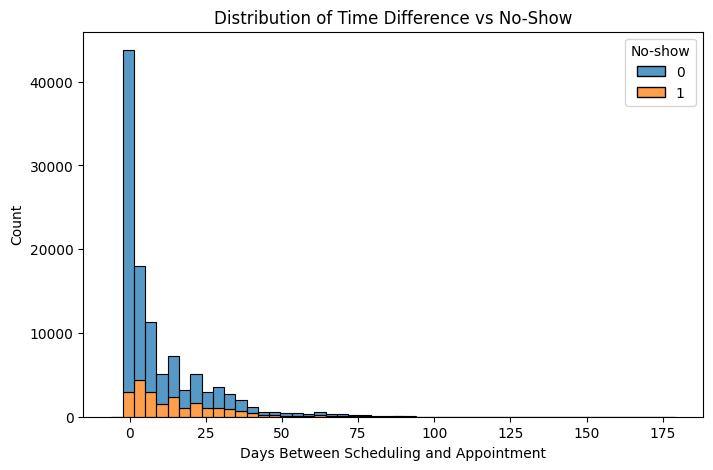

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='days_difference', hue='No-show', multiple='stack', bins=50)
plt.title("Distribution of Time Difference vs No-Show")
plt.xlabel("Days Between Scheduling and Appointment")
plt.ylabel("Count")
plt.show()

In [15]:
negative_days = df[df['days_difference'] == -1][['ScheduledDay', 'AppointmentDay']]
print(negative_days.head(10))


                   ScheduledDay            AppointmentDay
27033 2016-05-10 10:51:53+00:00 2016-05-09 00:00:00+00:00
55226 2016-05-18 14:50:41+00:00 2016-05-17 00:00:00+00:00
64175 2016-05-05 13:43:58+00:00 2016-05-04 00:00:00+00:00
72362 2016-05-04 06:50:57+00:00 2016-05-03 00:00:00+00:00


In [16]:
# After fixing date calculation:
df = df[df['days_difference'] >= 0].copy()


In [17]:
df['Age'].value_counts()

Age
 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: count, Length: 104, dtype: int64

In [18]:
median_age=df.loc[ df['Age'] >0, 'Age' ].median()
median_age

np.float64(38.0)

In [19]:
df.loc[ df['Age']==0 , 'Age']=median_age

In [20]:
df.loc[df["Age"] > 100, "Age"] = median_age


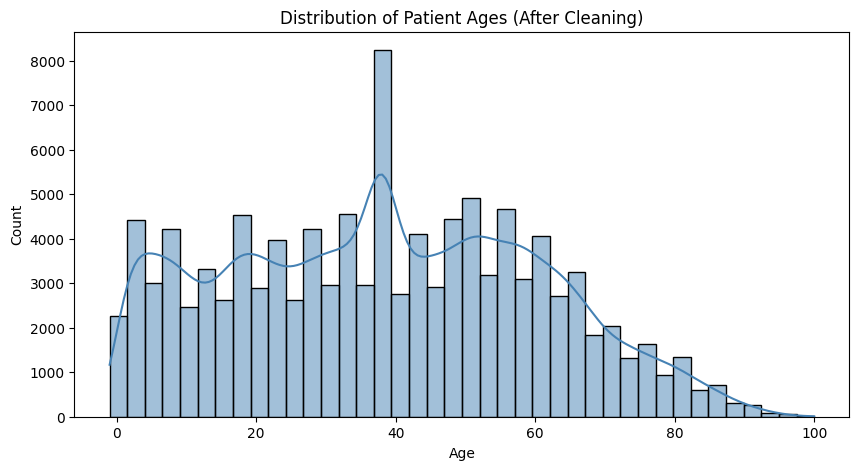

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=40, kde=True, color='steelblue')
plt.title('Distribution of Patient Ages (After Cleaning)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

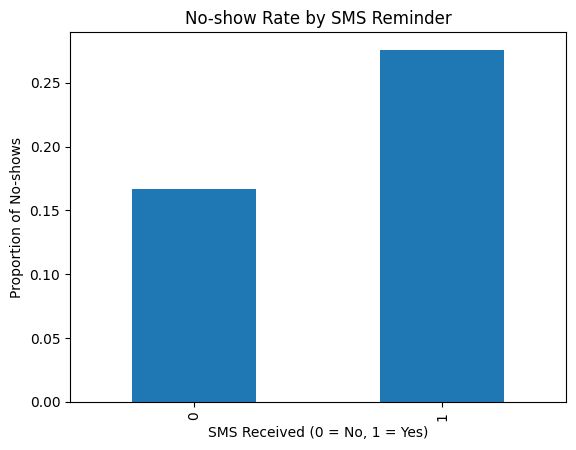

In [22]:
import matplotlib.pyplot as plt

sms_grouped = df.groupby('SMS_received')['No-show'].mean()
sms_grouped.plot(kind='bar')
plt.title('No-show Rate by SMS Reminder')
plt.xlabel('SMS Received (0 = No, 1 = Yes)')
plt.ylabel('Proportion of No-shows')
plt.show()


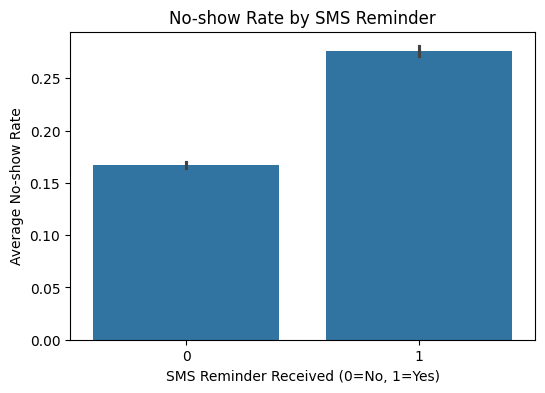

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(x='SMS_received', y='No-show', data=df)
plt.title('No-show Rate by SMS Reminder')
plt.xlabel('SMS Reminder Received (0=No, 1=Yes)')
plt.ylabel('Average No-show Rate')
plt.show()


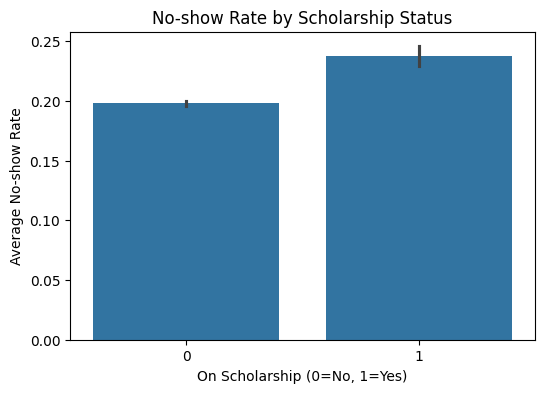

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(x='Scholarship', y='No-show', data=df)
plt.title('No-show Rate by Scholarship Status')
plt.xlabel('On Scholarship (0=No, 1=Yes)')
plt.ylabel('Average No-show Rate')
plt.show()


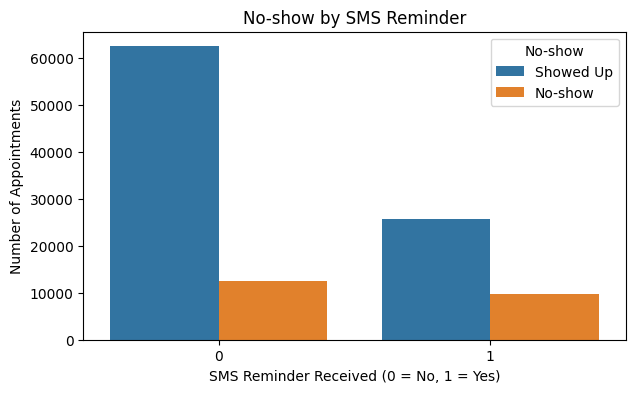

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.countplot(x='SMS_received', hue='No-show', data=df)
plt.title('No-show by SMS Reminder')
plt.xlabel('SMS Reminder Received (0 = No, 1 = Yes)')
plt.ylabel('Number of Appointments')
plt.legend(title='No-show', labels=['Showed Up', 'No-show'])
plt.show()


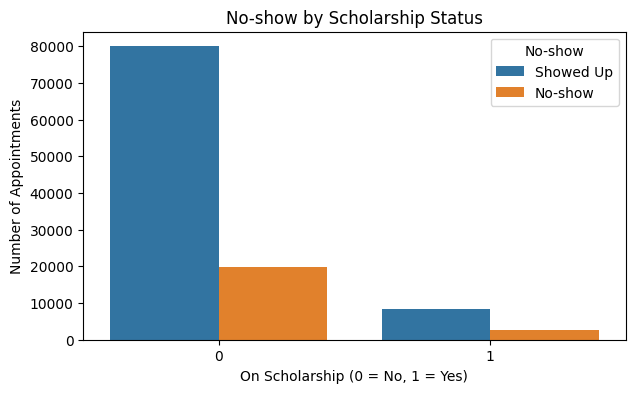

In [26]:
plt.figure(figsize=(7,4))
sns.countplot(x='Scholarship', hue='No-show', data=df)
plt.title('No-show by Scholarship Status')
plt.xlabel('On Scholarship (0 = No, 1 = Yes)')
plt.ylabel('Number of Appointments')
plt.legend(title='No-show', labels=['Showed Up', 'No-show'])
plt.show()


In [27]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show', 'Scheduled_Date', 'Appointment_Date',
       'Scheduled_Time', 'Appointment_Time', 'days_difference'],
      dtype='object')

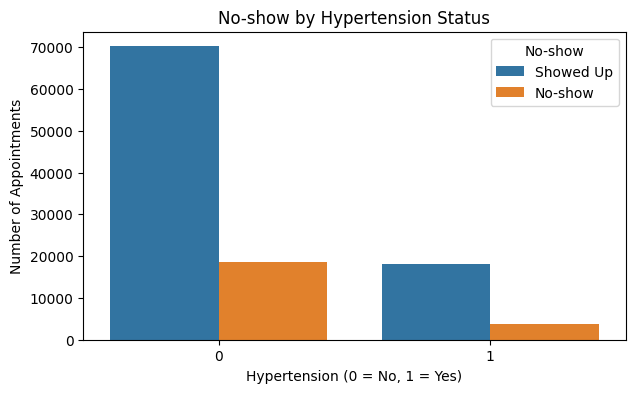

In [28]:
plt.figure(figsize=(7,4))
sns.countplot(x='Hipertension', hue='No-show', data=df)
plt.title('No-show by Hypertension Status')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Number of Appointments')
plt.legend(title='No-show', labels=['Showed Up', 'No-show'])
plt.show()


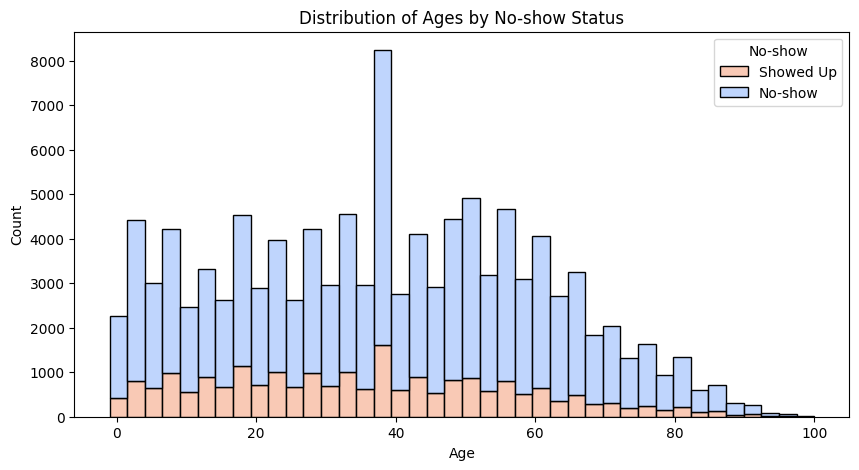

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Age', hue='No-show', bins=40, multiple='stack', palette='coolwarm')
plt.title('Distribution of Ages by No-show Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='No-show', labels=['Showed Up', 'No-show'])
plt.show()


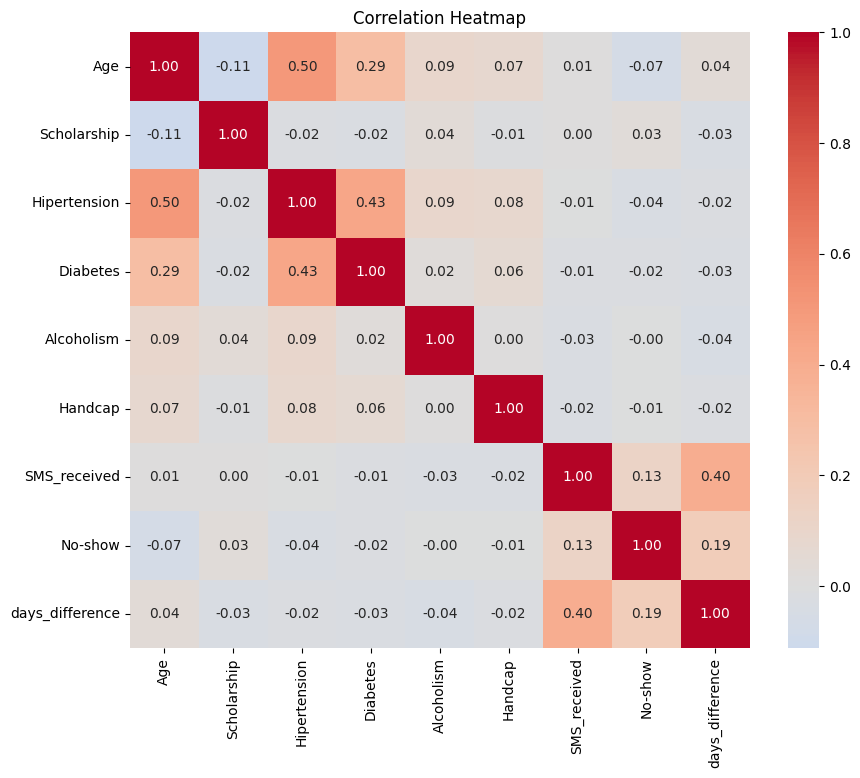

In [30]:
numeric_df = df.select_dtypes(include=["number"])

# Calculate correlations
corr = numeric_df.corr()

# Draw the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [32]:
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_Date,Appointment_Date,Scheduled_Time,Appointment_Time,days_difference
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,2016-04-29,18:38:08,00:00:00,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,16:08:27,00:00:00,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,16:19:04,00:00:00,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,2016-04-29,17:29:31,00:00:00,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,2016-04-29,16:07:23,00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,2016-05-03,2016-06-07,09:15:35,00:00:00,35
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,2016-05-03,2016-06-07,07:27:33,00:00:00,35
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,2016-04-27,2016-06-07,16:03:52,00:00:00,41
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,2016-04-27,2016-06-07,15:09:23,00:00:00,41


## Model Training and Hyperparameter Tuning

We experiment with Logistic Regression, Decision Trees, Random Forest, XGBoost, and ANN, using GridSearchCV for tuning.
Focus on F1 score due to imbalanced classes.


In [33]:
from sklearn.model_selection import train_test_split
features = [
    "Age",
    "Scholarship",
    "Hipertension",
    "Diabetes",
    "Alcoholism",
    "Handcap",
    "SMS_received",
    "days_difference"
]

X = df[features]
y = df["No-show"]

X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=42 , test_size=0.2)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    rec = recall_score(y_test, preds)
    results.append([name, acc, f1, rec])


In [35]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score", "Recall"])
print(results_df)

                 Model  Accuracy  F1 Score    Recall
0  Logistic Regression  0.799729  0.032773  0.017226
1        Decision Tree  0.776928  0.211923  0.152274
2        Random Forest  0.774395  0.234301  0.175241
3                  SVM  0.803031  0.000000  0.000000


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define your grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',   # Focus on F1 for no-shows (minority class)
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters found:  {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best F1 score:  0.44624021209144704


In [37]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.53      0.67     17751
           1       0.30      0.82      0.44      4354

    accuracy                           0.59     22105
   macro avg       0.61      0.67      0.56     22105
weighted avg       0.80      0.59      0.63     22105

[[9368 8383]
 [ 777 3577]]


In [38]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Initialize model with balanced weights for imbalanced dataset
xgb_clf = xgb.XGBClassifier(
    scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train),  # Balance the positive class
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train
xgb_clf.fit(X_train, y_train)

# Predict
y_pred = xgb_clf.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.55      0.69     17751
           1       0.30      0.79      0.44      4354

    accuracy                           0.60     22105
   macro avg       0.61      0.67      0.56     22105
weighted avg       0.79      0.60      0.64     22105

[[9783 7968]
 [ 927 3427]]


## Final Model Performance and Insights

Discuss precision, recall, F1, and confusion matrix.
Highlight feature importances driving predictions.


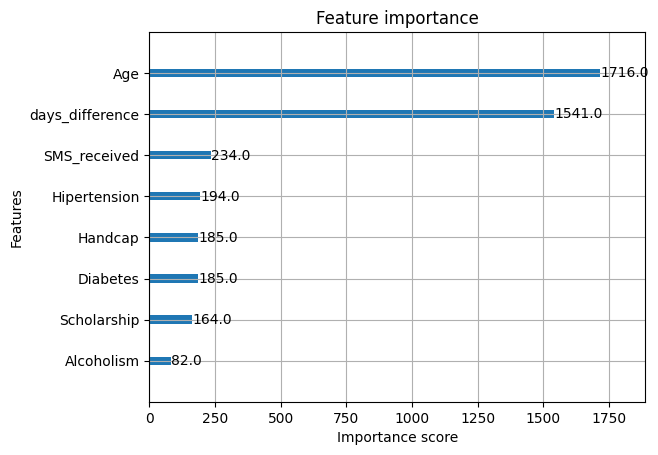

In [39]:
xgb.plot_importance(xgb_clf)
plt.show()
